In [0]:
import json
import time

import joblib
import keras
import tensorflow
from keras.engine.saving import load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D, concatenate, AveragePooling2D
from keras import models
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from keras import regularizers
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
#from keras.callbacks import tensorboard_v1
import cv2    
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/Final_Work_RE

/content/drive/My Drive/Final_Work_RE


In [0]:
import os
data_dir = './poison_flowers_TRAIN/'
train_dir = os.path.join(data_dir)

data_dir1 = './flowers_TEST/'
test_dir = os.path.join(data_dir1)
#print(os.listdir('../train'))

In [0]:
X=[]
Z=[]
IMG_SIZE=150
#FLOWER_DAISY_DIR='../daisy'
FLOWER_DAISY_DIR = os.path.join('./poison_flowers_TRAIN/daisy')
#FLOWER_SUNFLOWER_DIR='../input/flowers/flowers/sunflower'
#FLOWER_TULIP_DIR='../input/flowers/flowers/tulip'
#FLOWER_DANDI_DIR='../input/flowers/flowers/dandelion'
#FLOWER_ROSE_DIR='../rose'
FLOWER_ROSE_DIR=os.path.join('./poison_flowers_TRAIN/rose')
FLOWER_SUNFLOWER_DIR=os.path.join('./poison_flowers_TRAIN/sunflower')
FLOWER_TULIP_DIR=os.path.join('./poison_flowers_TRAIN/tulip')
FLOWER_DANDI_DIR=os.path.join('./poison_flowers_TRAIN/dandelion')



X1=[]
Z1=[]
IMG_SIZE=150
#FLOWER_DAISY_DIR='../daisy'
FLOWER_DAISYTest_DIR = os.path.join('./flowers_TEST/daisy')
#FLOWER_SUNFLOWER_DIR='../input/flowers/flowers/sunflower'
#FLOWER_TULIP_DIR='../input/flowers/flowers/tulip'
#FLOWER_DANDI_DIR='../input/flowers/flowers/dandelion'
#FLOWER_ROSE_DIR='../rose'
FLOWER_ROSETest_DIR=os.path.join('./flowers_TEST/rose')
FLOWER_SUNFLOWERTest_DIR=os.path.join('./flowers_TEST/sunflower')
FLOWER_TULIPTest_DIR=os.path.join('./flowers_TEST/tulip')
FLOWER_DANDITest_DIR=os.path.join('./flowers_TEST/dandelion')


In [0]:
def assign_label(img,flower_type):
    return flower_type

In [0]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        

In [0]:
def make_test_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X1.append(np.array(img))
        Z1.append(str(label))

In [0]:
make_train_data('Daisy', FLOWER_DAISY_DIR)
print(len(X))

make_test_data('Daisy', FLOWER_DAISYTest_DIR)
print(len(X1))

100%|██████████| 700/700 [05:43<00:00,  2.04it/s]


700


100%|██████████| 84/84 [00:43<00:00,  1.93it/s]

84


In [0]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))
make_test_data('Sunflower', FLOWER_SUNFLOWERTest_DIR)
print(len(X1))

  0%|          | 0/84 [00:00<?, ?it/s]

1400


100%|██████████| 84/84 [00:40<00:00,  2.08it/s]

168


In [0]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))
make_test_data('Tulip', FLOWER_TULIPTest_DIR)
print(len(X1))

  0%|          | 0/84 [00:00<?, ?it/s]

2100


100%|██████████| 84/84 [00:39<00:00,  2.11it/s]

252


In [0]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))
make_test_data('Dandelion', FLOWER_DANDITest_DIR)
print(len(X1))

  0%|          | 0/84 [00:00<?, ?it/s]

2800


100%|██████████| 84/84 [00:40<00:00,  2.08it/s]

336


In [0]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

make_test_data('Rose',FLOWER_ROSETest_DIR)
print(len(X1))

  0%|          | 0/84 [00:00<?, ?it/s]

3500


100%|██████████| 84/84 [00:41<00:00,  2.00it/s]

420


In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

le1=LabelEncoder()
Y1=le1.fit_transform(Z1)
Y1=to_categorical(Y1,5)
X1=np.array(X1)
X1=X1/255

print(X1.shape)
print(X.shape)

(420, 150, 150, 3)
(3500, 150, 150, 3)


In [0]:
x_train = X
y_train = Y
x_test = X1
y_test = Y1

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [0]:
#model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
'''import os
#train_root='../input/indoor-scenes-cvpr-2019/indoorCVPR_09/Images'#
train_dir = './train/'
train_root=os.path.join(train_dir)
#vaildation_root='/home/faith/keras/dataset/vaildationdata/'
test_dir = './test/'
test_root=os.path.join(test_dir)
print(train_root)'''

"import os\n#train_root='../input/indoor-scenes-cvpr-2019/indoorCVPR_09/Images'#\ntrain_dir = './train/'\ntrain_root=os.path.join(train_dir)\n#vaildation_root='/home/faith/keras/dataset/vaildationdata/'\ntest_dir = './test/'\ntest_root=os.path.join(test_dir)\nprint(train_root)"

In [0]:

'''LEARNING_RATE=0.01
MOMENTUM=0.9
ALPHA=0.0001
BETA=0.75
GAMMA=0.1
DROPOUT=0.4
WEIGHT_DECAY=0.0005
LRN2D_NORM=True
DATA_FORMAT='channels_last' # Theano:'channels_first' Tensorflow:'channels_last'
USE_BN=True
'''



IM_WIDTH=299
IM_HEIGHT=299
#EPOCH=200
#batch_size=32
NB_CLASS=5

In [0]:

'''datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3,
    rescale=1./255
)
train_generator = datagen.flow_from_directory(
  train_root,
  target_size=(IM_WIDTH, IM_HEIGHT),
  batch_size=batch_size,
  class_mode='categorical', subset='training'
)'''

"datagen = ImageDataGenerator(\n    rotation_range=30,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    validation_split=0.3,\n    rescale=1./255\n)\ntrain_generator = datagen.flow_from_directory(\n  train_root,\n  target_size=(IM_WIDTH, IM_HEIGHT),\n  batch_size=batch_size,\n  class_mode='categorical', subset='training'\n)"

In [0]:

'''#vaild data
vaild_generator = datagen.flow_from_directory(
  train_root,
  target_size=(IM_WIDTH, IM_HEIGHT),
  batch_size=batch_size,
  class_mode='categorical', subset='validation'
)
#test data
test_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    featurewise_center=True
)
test_generator = datagen.flow_from_directory(
  test_root,
  target_size=(IM_WIDTH, IM_HEIGHT),
  batch_size=batch_size,
)'''

"#vaild data\nvaild_generator = datagen.flow_from_directory(\n  train_root,\n  target_size=(IM_WIDTH, IM_HEIGHT),\n  batch_size=batch_size,\n  class_mode='categorical', subset='validation'\n)\n#test data\ntest_datagen = ImageDataGenerator(\n    rotation_range=30,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    featurewise_center=True\n)\ntest_generator = datagen.flow_from_directory(\n  test_root,\n  target_size=(IM_WIDTH, IM_HEIGHT),\n  batch_size=batch_size,\n)"

In [0]:
batch_size=32
import numpy as n

In [0]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(NB_CLASS, activation='softmax')(x)
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

87916544/87910968 [==============================] - 3s 0us/step


In [24]:


# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
# train the model on the new data for a few epochs
'''model.fit_generator(train_generator,
                    validation_data=vaild_generator,
                    epochs=EPOCH,
                    steps_per_epoch=train_generator.n/batch_size,
                    validation_steps=vaild_generator.n/batch_size,
                    shuffle=True,
                    verbose=1)'''
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = 100, verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model.save('scene_inception_3_1.h5')
history=model.history
joblib.dump((history), "scene_trainHistory1.pkl", compress=3)

Epoch 1/100
109/109 [==============================] - 26s 235ms/step - loss: 1.7774 - accuracy: 0.4585
Epoch 2/100
109/109 [==============================] - 17s 156ms/step - loss: 1.1194 - accuracy: 0.5892
Epoch 3/100
109/109 [==============================] - 17s 153ms/step - loss: 0.9917 - accuracy: 0.6282
Epoch 4/100
109/109 [==============================] - 17s 153ms/step - loss: 0.9521 - accuracy: 0.6476
Epoch 5/100
109/109 [==============================] - 17s 155ms/step - loss: 0.8955 - accuracy: 0.6743
Epoch 6/100
109/109 [==============================] - 17s 152ms/step - loss: 0.8408 - accuracy: 0.6897
Epoch 7/100
109/109 [==============================] - 18s 162ms/step - loss: 0.8543 - accuracy: 0.6802
Epoch 8/100
109/109 [==============================] - 17s 160ms/step - loss: 0.8087 - accuracy: 0.7053
Epoch 9/100
109/109 [==============================] - 18s 162ms/step - loss: 0.7841 - accuracy: 0.7073
Epoch 10/100
109/109 [==============================] - 17s 160m

['scene_trainHistory1.pkl']

In [25]:

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
plot_model(model)
#model.summary()
plot_model(model, to_file='model.png')
'''for i, layer in enumerate(base_model.layers):
   print(i, layer.name)'''

'for i, layer in enumerate(base_model.layers):\n   print(i, layer.name)'

In [26]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:17+1]:
   layer.trainable = False
for layer in model.layers[17+1:]:
   layer.trainable = True
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
'''model.fit_generator(train_generator,
                    validation_data=vaild_generator,
                    epochs=EPOCH,
                    steps_per_epoch=train_generator.n/batch_size,
                    validation_steps=vaild_generator.n/batch_size,
                    shuffle=True,
                    verbose=1)'''
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = 50, verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model.save('scene_inception_3_1.h5')

Epoch 1/50
109/109 [==============================] - 36s 333ms/step - loss: 0.4134 - accuracy: 0.8815
Epoch 2/50
109/109 [==============================] - 23s 209ms/step - loss: 0.3212 - accuracy: 0.9037
Epoch 3/50
109/109 [==============================] - 23s 212ms/step - loss: 0.3166 - accuracy: 0.9002
Epoch 4/50
109/109 [==============================] - 23s 212ms/step - loss: 0.2661 - accuracy: 0.9106
Epoch 5/50
109/109 [==============================] - 23s 212ms/step - loss: 0.2424 - accuracy: 0.9249
Epoch 6/50
109/109 [==============================] - 23s 211ms/step - loss: 0.2216 - accuracy: 0.9289
Epoch 7/50
109/109 [==============================] - 23s 213ms/step - loss: 0.1841 - accuracy: 0.9337
Epoch 8/50
109/109 [==============================] - 23s 213ms/step - loss: 0.2028 - accuracy: 0.9360
Epoch 9/50
109/109 [==============================] - 23s 213ms/step - loss: 0.2118 - accuracy: 0.9322
Epoch 10/50
109/109 [==============================] - 23s 215ms/step - l

In [27]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print('Final Loss1: {}, Final Accuracy1: {}'.format(final_loss, final_accuracy))

420/420 [==============================] - 3s 8ms/step
Final Loss1: 0.8538028197629112, Final Accuracy1: 0.8666666746139526


In [28]:

'''model.save('scene_inception_3_2.h5')
history=model.history
joblib.dump((history), "scene_trainHistory2.pkl", compress=3)
loss,acc=model.evaluate_generator(test_generator,steps=vaild_generator.n/batch_size)
print('Test result:loss:%f,acc:%f'%(loss,acc))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("scene_acc.png")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("scene_loss.png")
plt.show()'''


'model.save(\'scene_inception_3_2.h5\')\nhistory=model.history\njoblib.dump((history), "scene_trainHistory2.pkl", compress=3)\nloss,acc=model.evaluate_generator(test_generator,steps=vaild_generator.n/batch_size)\nprint(\'Test result:loss:%f,acc:%f\'%(loss,acc))\n\nplt.plot(history.history[\'accuracy\'])\nplt.plot(history.history[\'val_accuracy\'])\nplt.title(\'Model accuracy\')\nplt.ylabel(\'Accuracy\')\nplt.xlabel(\'Epoch\')\nplt.legend([\'Train\', \'Test\'], loc=\'upper left\')\nplt.savefig("scene_acc.png")\nplt.show()\n\nplt.plot(history.history[\'loss\'])\nplt.plot(history.history[\'val_loss\'])\nplt.title(\'Model loss\')\nplt.ylabel(\'Loss\')\nplt.xlabel(\'Epoch\')\nplt.legend([\'Train\', \'Test\'], loc=\'upper left\')\nplt.savefig("scene_loss.png")\nplt.show()'

In [29]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

print(pred)

[[6.2860310e-02 5.6326957e-03 1.7239113e-07 9.3150681e-01 1.2583502e-10]
 [9.9997377e-01 7.3502619e-08 8.6921297e-09 1.2233672e-08 2.6084801e-05]
 [9.9986267e-01 4.6566726e-08 2.0554013e-10 1.3731561e-04 6.8411842e-14]
 ...
 [1.6118781e-12 4.9400859e-14 9.9992812e-01 1.7558552e-12 7.1855880e-05]
 [1.9288840e-03 4.6007097e-02 4.5389149e-01 4.2255720e-01 7.5615250e-02]
 [1.8088684e-04 2.9175828e-04 9.9510694e-01 2.3972343e-04 4.1807434e-03]]


Text(0.5, 145.31999999999996, 'Predicted')

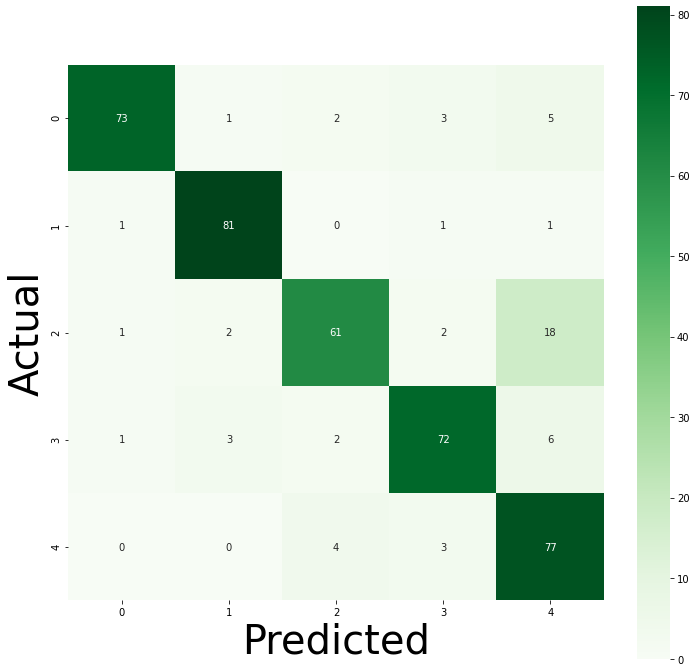

In [30]:
Y_pred = np.argmax(pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)